In [20]:
darkdirectory = "/Users/alan/Downloads/frida/20251023/"
flatdirectory = "/Users/alan/Downloads/frida/20251027/"

In [21]:
import sys
sys.path.append(".")
import h2rg

In [22]:
import glob
import astropy.io
import astropy.stats
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [23]:
def imshow(data, vmin, vmax):
    plt.imshow(data,vmin=vmin, vmax=vmax, origin="lower")
    plt.colorbar()
    plt.xticks(np.arange(0,data.shape[1]+1,256))
    plt.yticks(np.arange(0,data.shape[0]+1,256))

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1467.37
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4064.02
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6174.21
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8343.50
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10498.16
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12633.36
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 14745.12
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 16817.93
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 18871.85
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 20897.42
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 22904.70
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

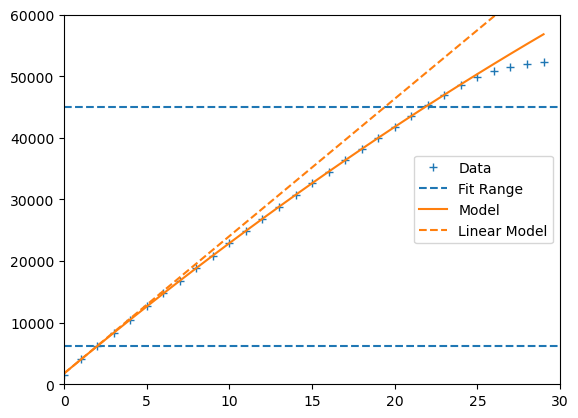

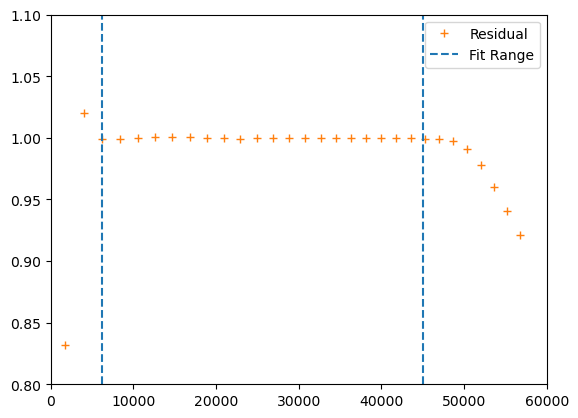

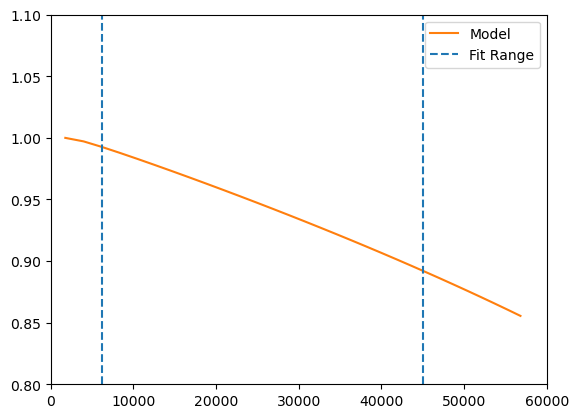

In [24]:
darkfitspaths = sorted(glob.glob(darkdirectory + "*.fits"))
flatfitspaths = sorted(glob.glob(flatdirectory + "*.fits"))

nreset = 3
nmax = 30
datamax = 45000

sy = slice(4, 2044)
sx = slice(4, 2044)

meanlist = []

ifitmin = 2
ifitmax = 0

def linearity(axis=None):

    for i, darkfitspath, flatfitspath in zip(range(0, nmax), darkfitspaths[nreset-1:][:nmax], flatfitspaths[nreset-1:][:nmax]):
        header, darkdata = h2rg.readfits(darkfitspath)
        header, flatdata = h2rg.readfits(flatfitspath)
        data = flatdata - darkdata
        data = flatdata
        data = h2rg.channelcorrection(data, order=1)
        print(
            "%s %3d %8.2f"
            % (flatfitspath, i, np.nanmean(data[sy,sx]))
        )
        mean = np.nanmean(data[sy,sx], axis=axis)
        global ifitmax
        if mean < datamax:
            ifitmax = i
        meanlist.append(mean)

    i = np.arange(nmax)

    P = np.polynomial.Polynomial.fit(i[ifitmin:ifitmax], meanlist[ifitmin:ifitmax], 2).convert()
    P1 = P.truncate(2)
    print(P.coef)
    print(P1.coef)

    plt.plot(i, meanlist, linestyle="none", marker="+", label="Data")
    plt.axhline(meanlist[ifitmin], color="C0", linestyle="dashed", label="Fit Range")
    plt.axhline(datamax, color="C0", linestyle="dashed")
    plt.plot(i, P(i), label="Model", color="C1")
    plt.plot(i, P1(i), label="Linear Model", color="C1", linestyle="dashed")
    plt.ylim(0, 60e3)
    plt.xlim(0, nmax)
    plt.legend()
    plt.savefig("linearity-data.png")
    plt.show()

    plt.plot(P(i), meanlist/P(i), label="Residual", linestyle="none", marker="+", color="C1")
    plt.axvline(meanlist[ifitmin], color="C0", linestyle="dashed", label="Fit Range")
    plt.axvline(datamax, color="C0", linestyle="dashed")
    plt.legend()
    plt.xlim(0, 60e3)
    plt.ylim(0.8,1.1)
    plt.savefig("linearity-residual.png")
    plt.show()

    plt.plot(P(i), P(i) / P1(i), color="C1", label="Model")
    plt.axvline(meanlist[ifitmin], color="C0", linestyle="dashed", label="Fit Range")
    plt.axvline(datamax, color="C0", linestyle="dashed")
    plt.legend()
    plt.xlim(0, 60e3)
    plt.ylim(0.8,1.1)
    plt.savefig("linearity-correction.png")
    plt.show()


linearity()


/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1423.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3475.19
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5159.65
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  6868.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  8604.18
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 10324.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 12031.20
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 13720.10
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 15394.79
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 17048.55
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 18688.48
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

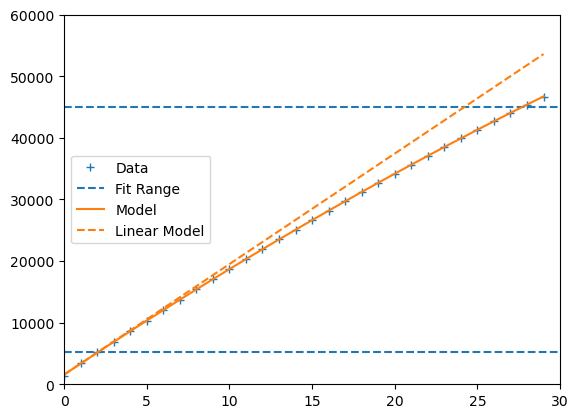

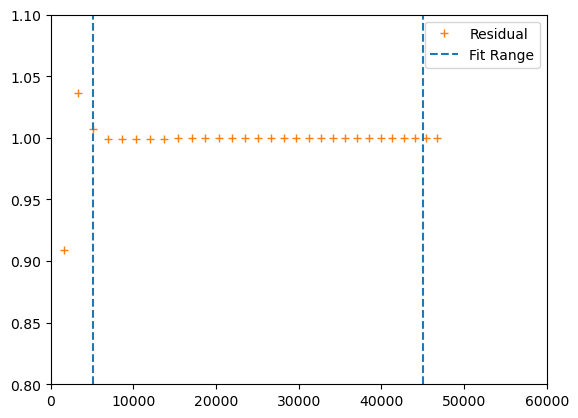

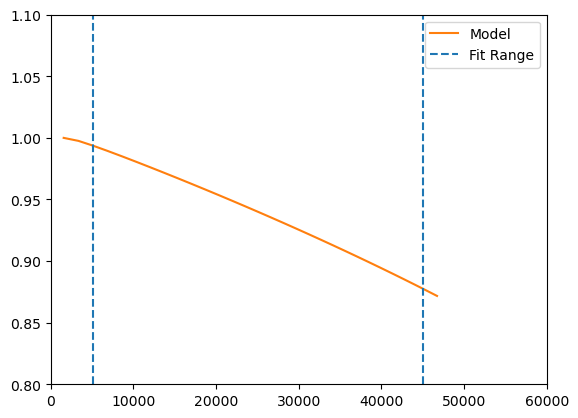

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1472.93
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3570.75
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5278.37
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7010.44
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  8756.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 10490.98
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 12210.77
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 13910.69
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 15603.16
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 17234.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 18887.71
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

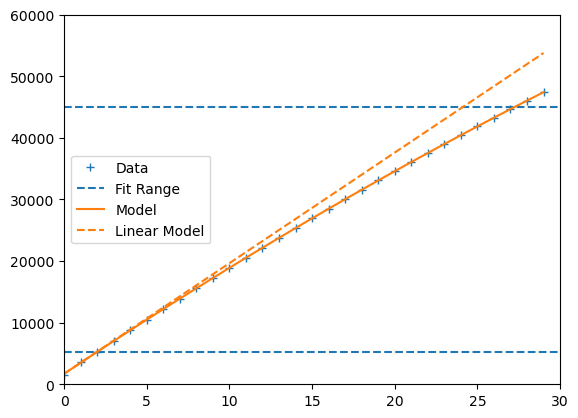

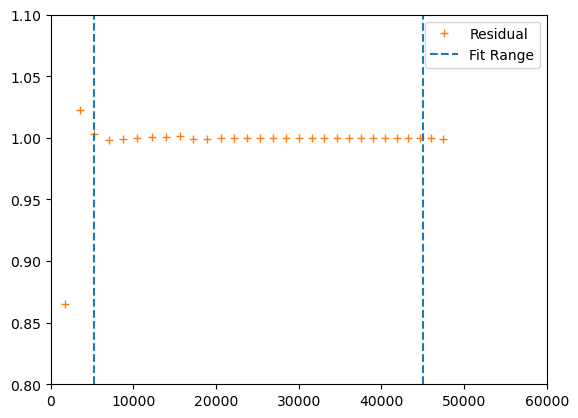

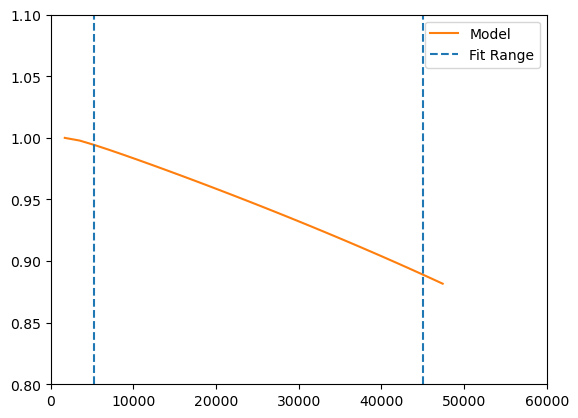

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1476.14
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3660.60
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5384.75
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7188.15
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  8979.46
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 10757.50
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 12522.47
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 14269.19
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 16001.23
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 17716.08
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 19373.53
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

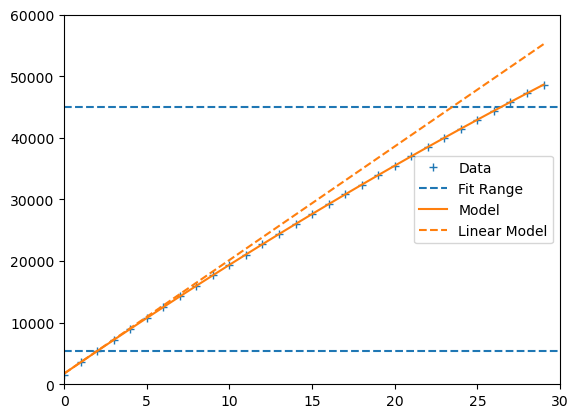

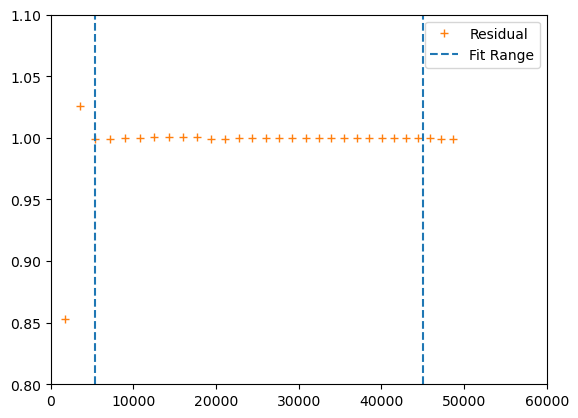

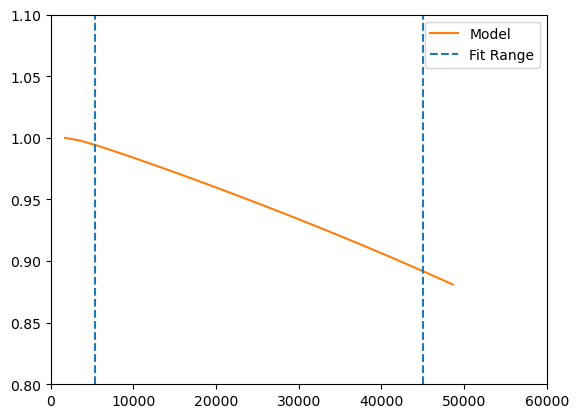

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1586.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3853.71
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5641.83
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7506.70
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  9358.92
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 11197.23
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 13018.58
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 14821.26
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 16608.48
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 18336.43
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 20083.49
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

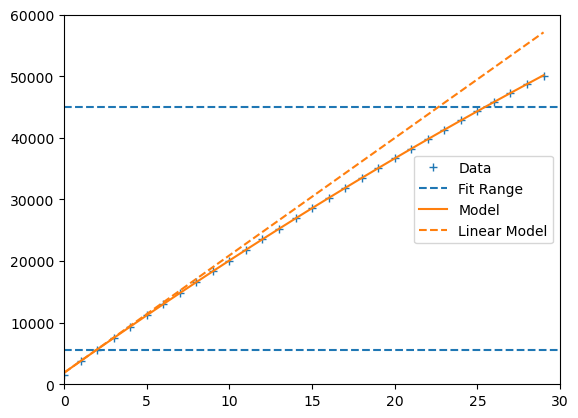

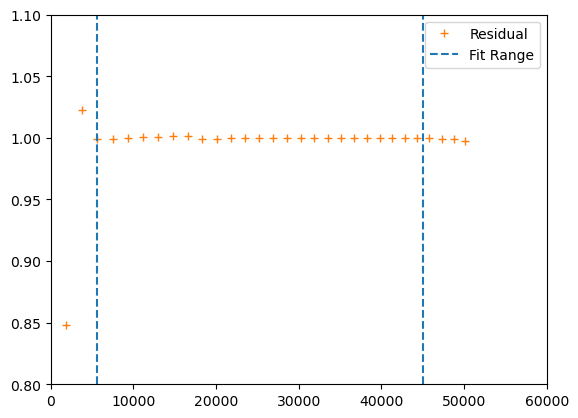

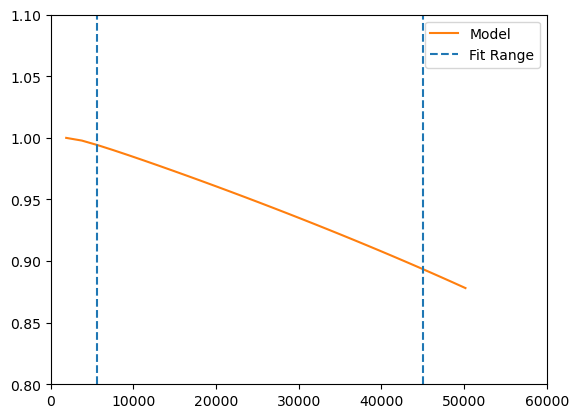

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1425.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3776.44
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5663.80
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7568.67
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  9488.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 11388.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 13276.21
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 15143.47
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 16990.72
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 18780.65
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 20586.74
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

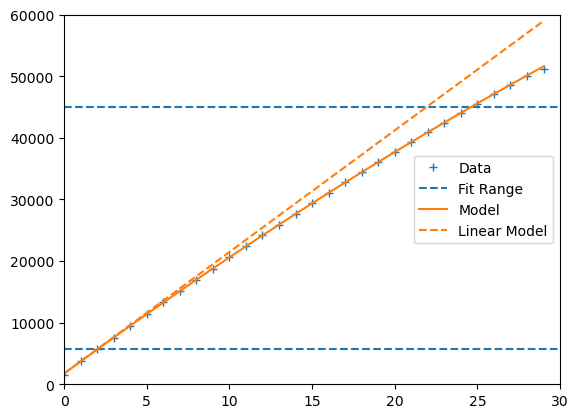

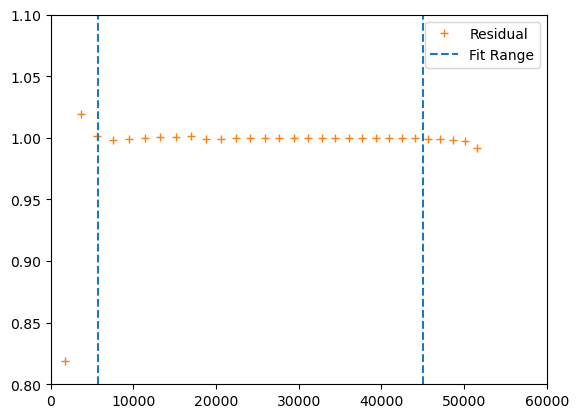

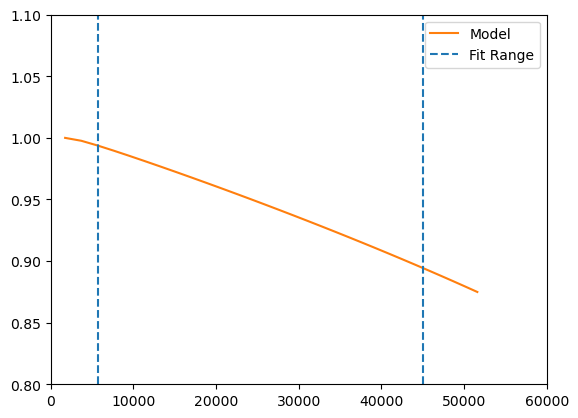

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1293.16
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3726.32
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5651.55
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7648.33
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  9628.86
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 11597.00
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 13543.45
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 15469.05
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 17374.28
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 19259.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 21081.51
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

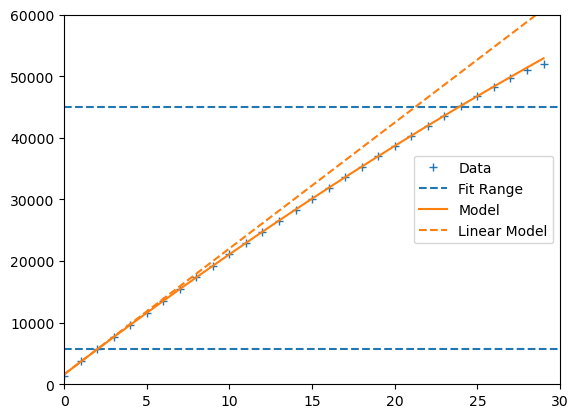

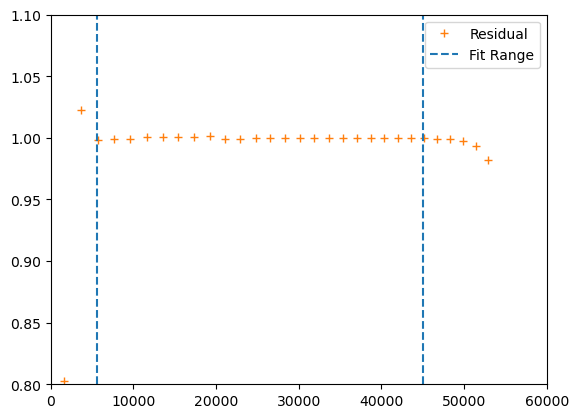

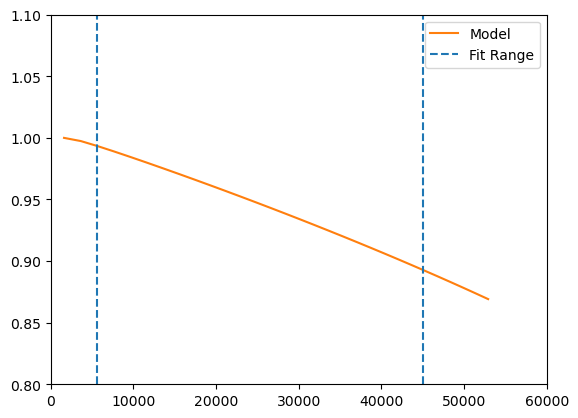

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1156.46
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3655.22
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5644.29
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7699.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  9740.82
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 11763.93
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 13770.56
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 15719.85
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 17678.29
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 19614.36
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 21530.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

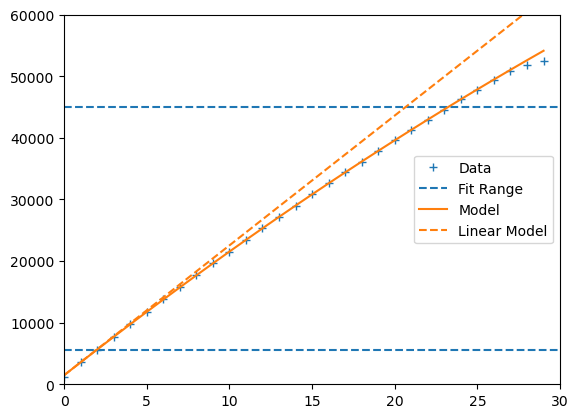

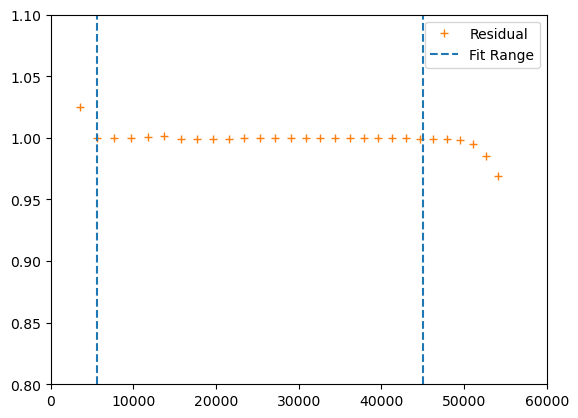

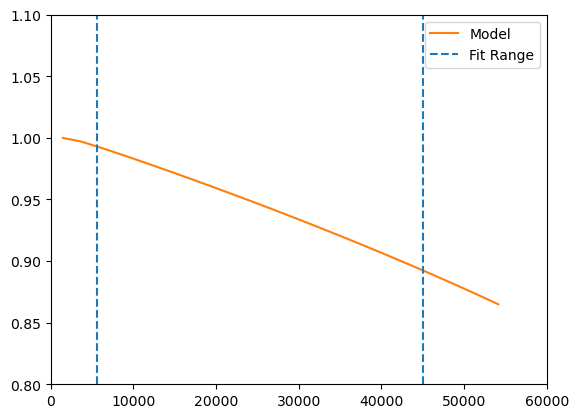

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1173.25
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3725.96
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5763.02
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7866.76
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  9952.60
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12020.79
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 14071.55
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 16059.49
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 18058.20
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 20035.79
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 21990.67
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

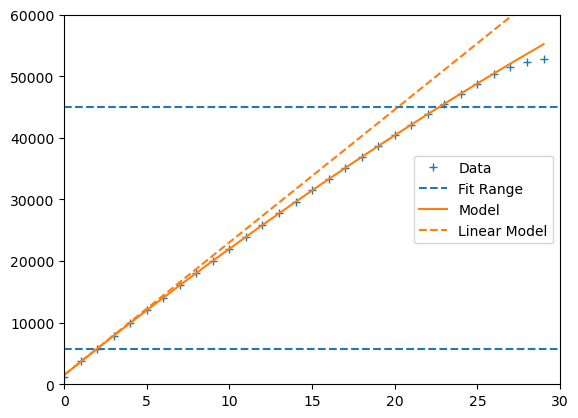

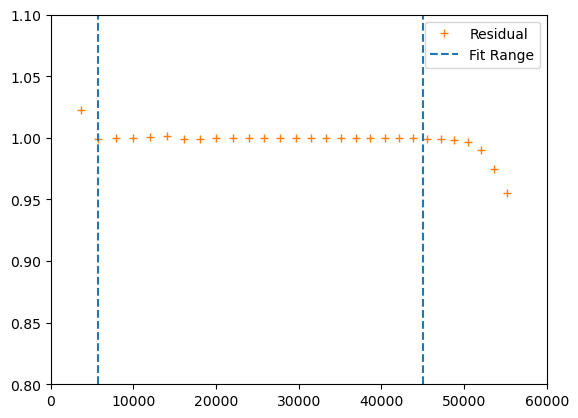

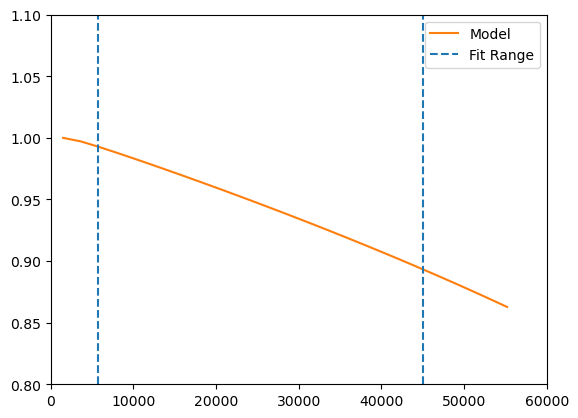

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1368.22
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3963.08
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6068.87
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8158.45
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10281.62
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12385.18
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 14468.27
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 16528.24
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 18564.28
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 20576.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 22517.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

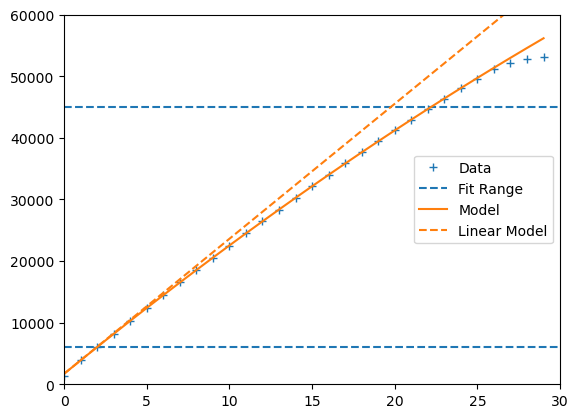

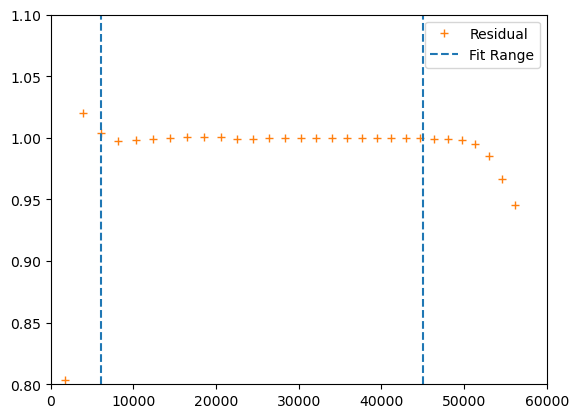

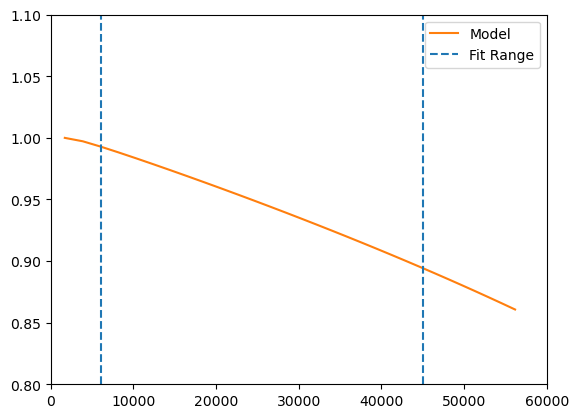

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1481.22
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4118.65
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6229.43
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8404.99
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10566.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12706.75
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 14825.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 16918.96
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 18990.11
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 20991.27
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23011.94
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

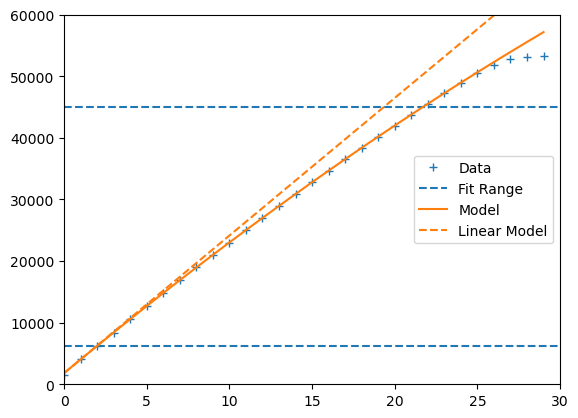

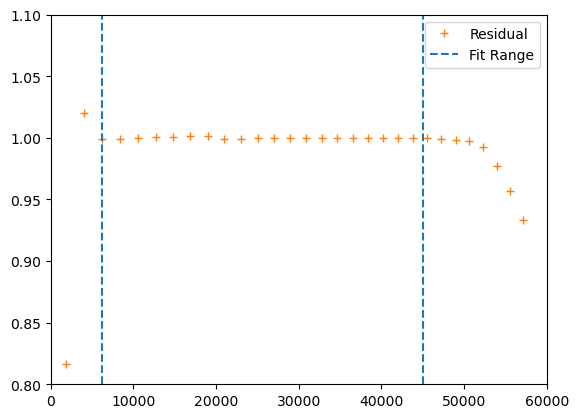

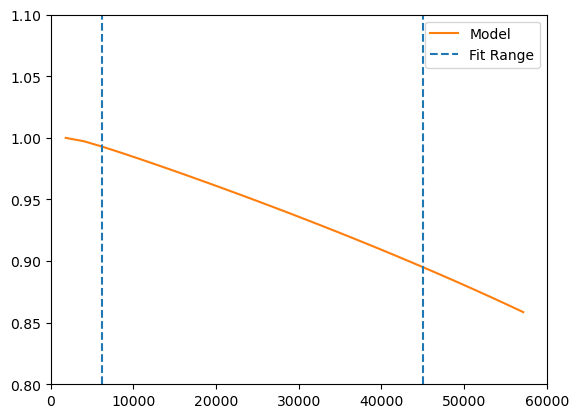

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1537.63
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4194.32
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6336.64
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8538.24
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10724.35
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12889.60
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15032.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17147.31
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19237.27
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21259.03
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23299.48
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

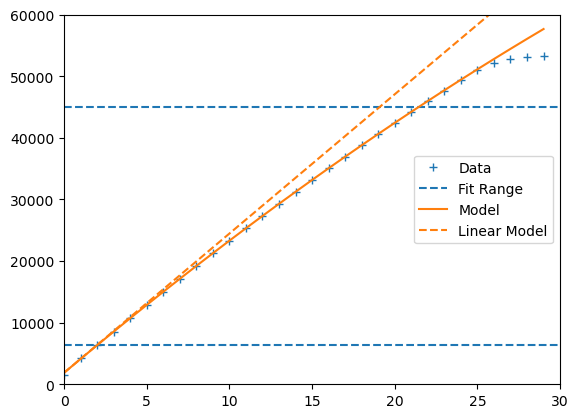

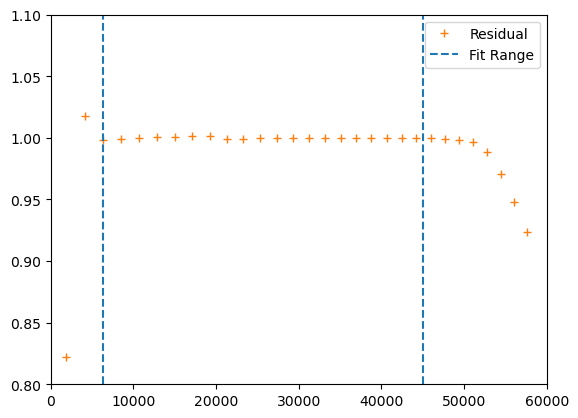

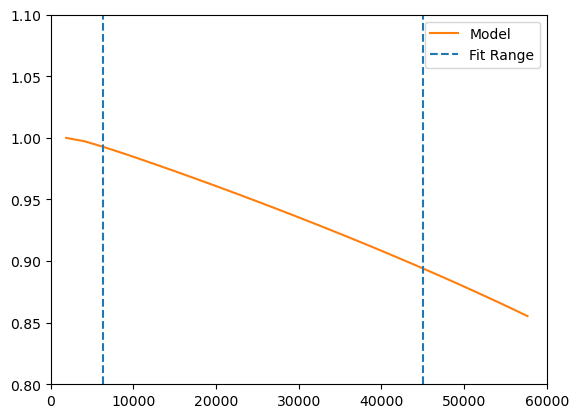

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1477.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4153.54
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6310.32
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8533.70
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10742.53
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12928.86
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15092.73
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17227.53
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19297.21
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21379.79
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23439.95
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

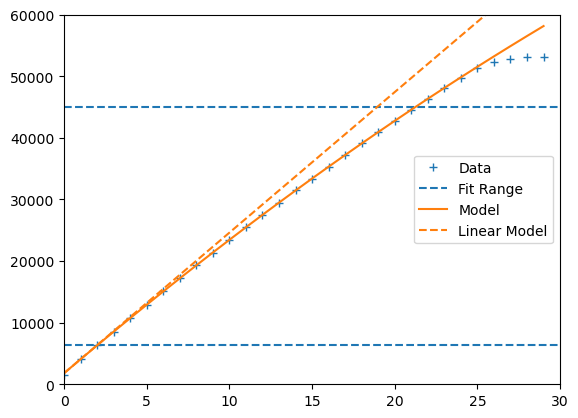

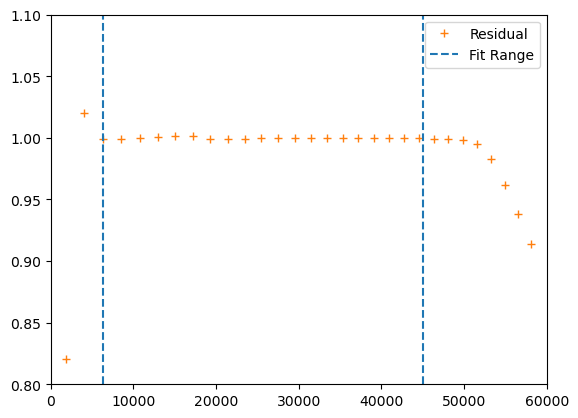

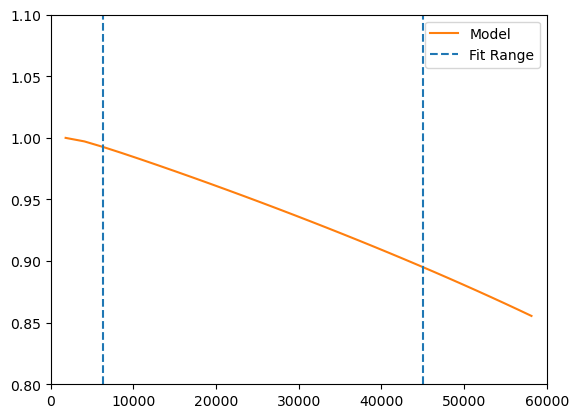

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1498.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4195.99
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6374.31
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8620.26
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10845.80
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13049.11
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15229.24
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17382.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19468.43
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21569.63
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23646.37
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

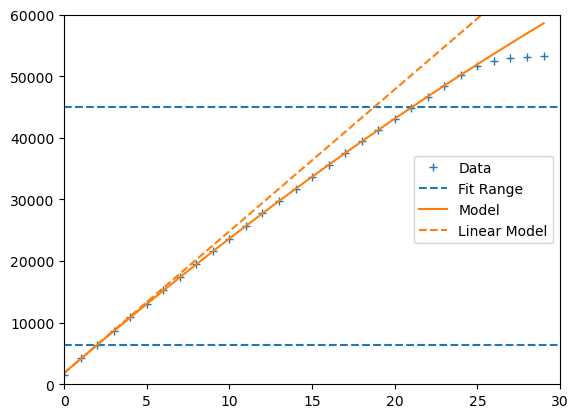

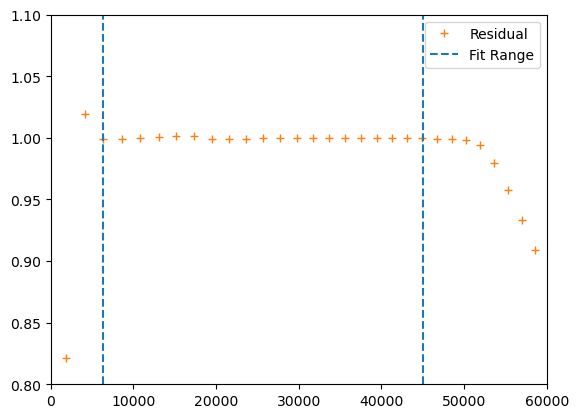

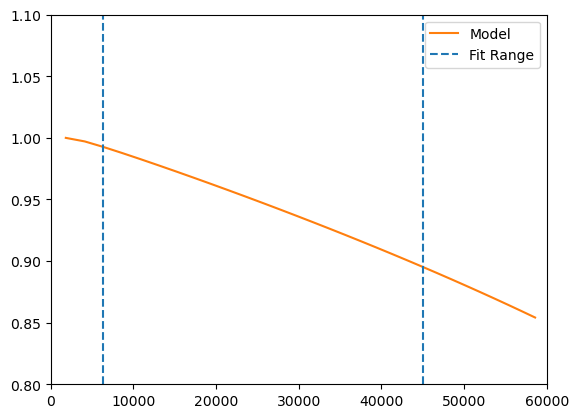

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1540.85
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4264.27
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6464.13
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8725.62
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10970.67
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13195.30
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15394.09
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17526.29
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19668.11
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21781.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23872.00
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

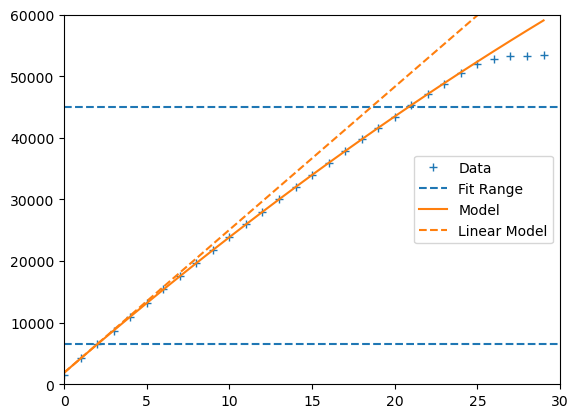

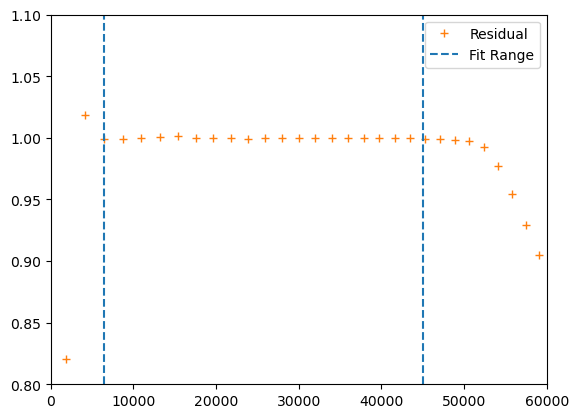

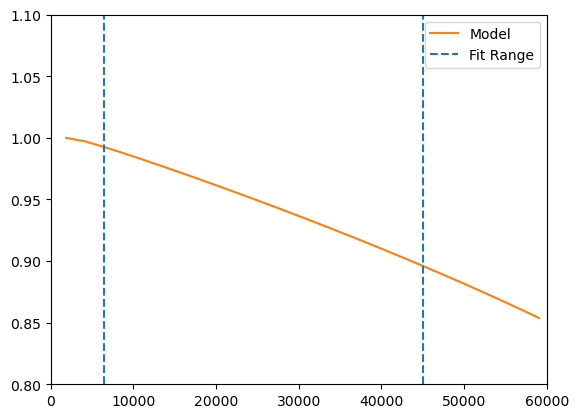

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1501.87
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4223.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6427.68
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8692.11
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10935.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13162.21
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15361.05
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17494.14
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19635.55
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21753.22
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23845.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

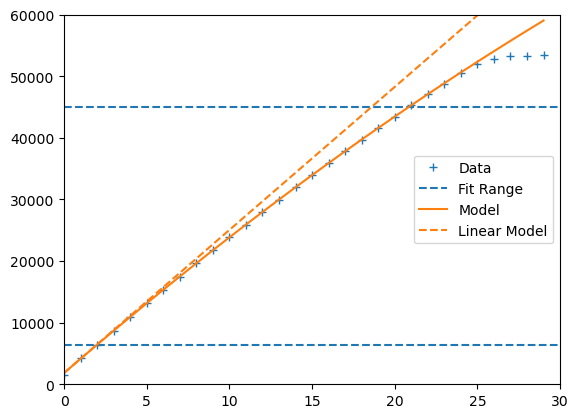

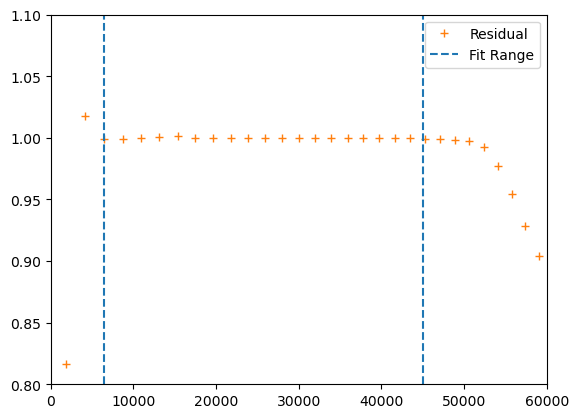

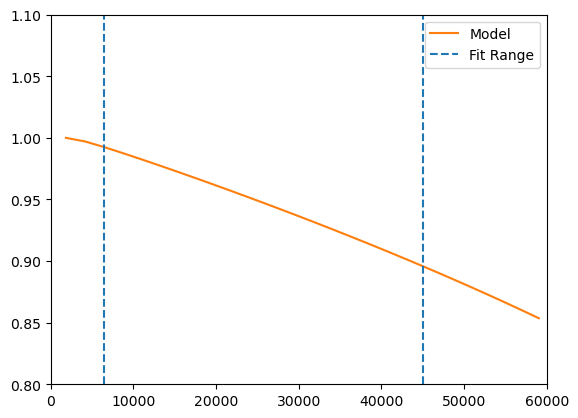

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1367.32
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4092.49
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6298.16
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8567.15
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10815.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13046.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15215.66
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17387.99
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19537.06
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21659.36
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23756.33
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

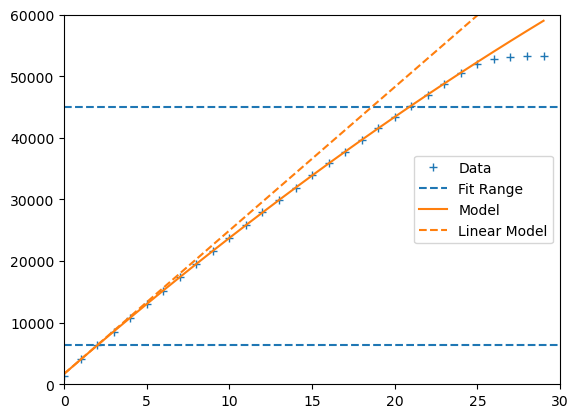

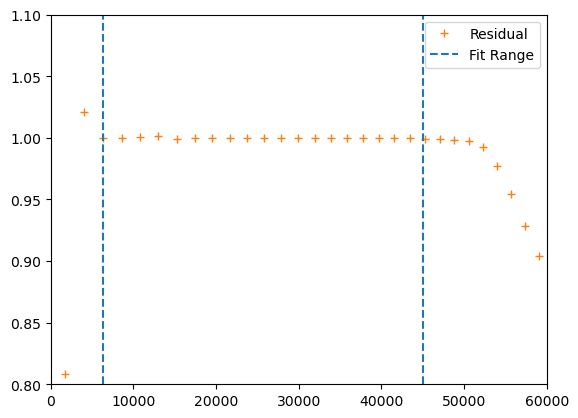

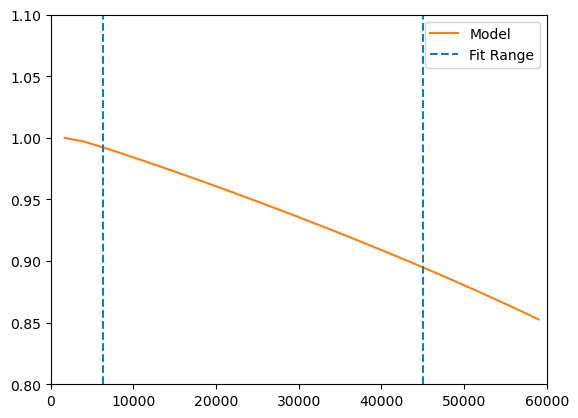

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1464.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4178.74
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6381.14
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8647.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10895.30
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13121.25
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15323.00
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17495.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19599.49
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21717.47
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23812.40
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

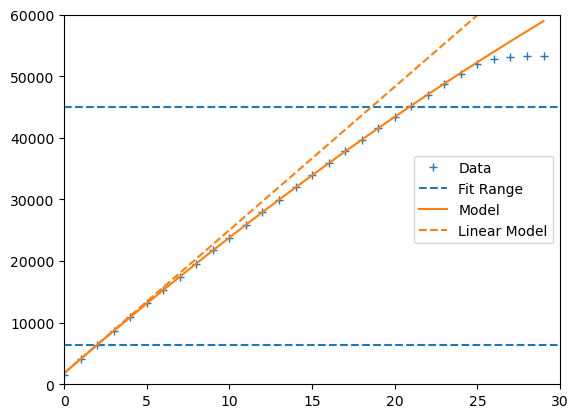

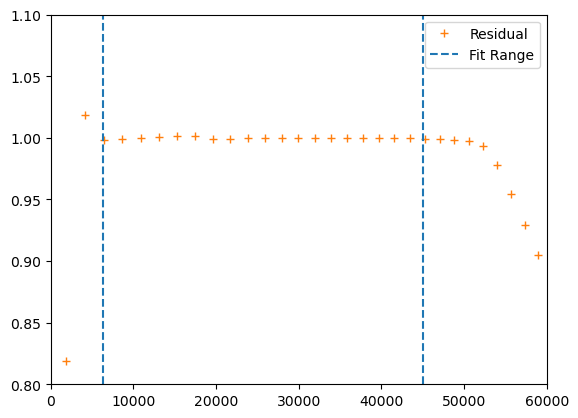

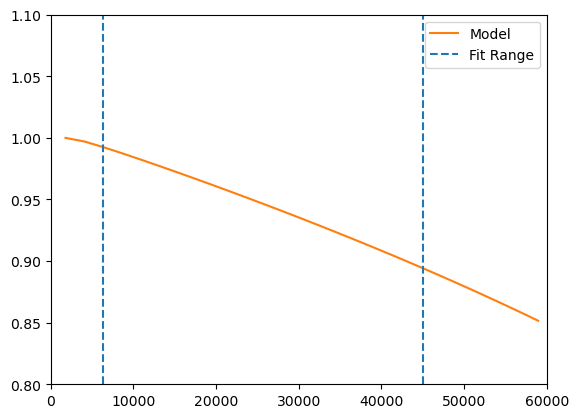

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1566.01
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4295.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6507.83
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8784.76
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11043.24
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13276.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15487.90
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17629.33
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19781.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21907.30
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24009.49
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

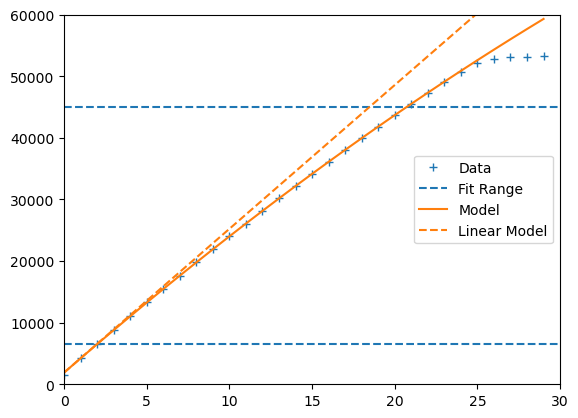

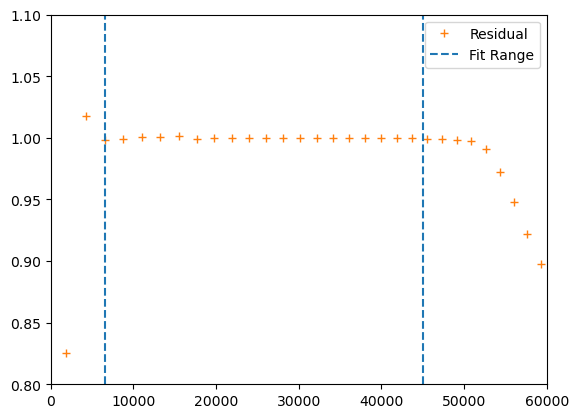

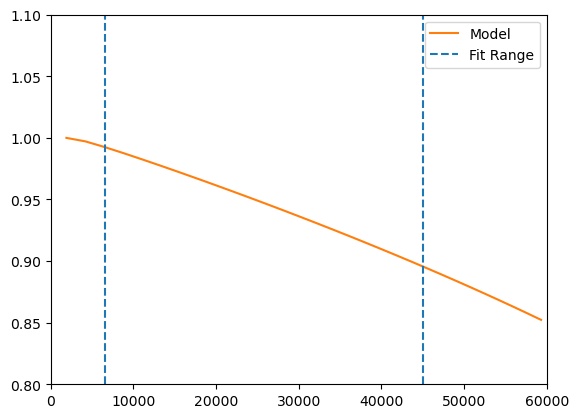

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1777.21
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4507.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6726.29
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  9004.17
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11262.81
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13500.19
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15712.48
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17853.57
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 20008.31
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 22135.11
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24238.95
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

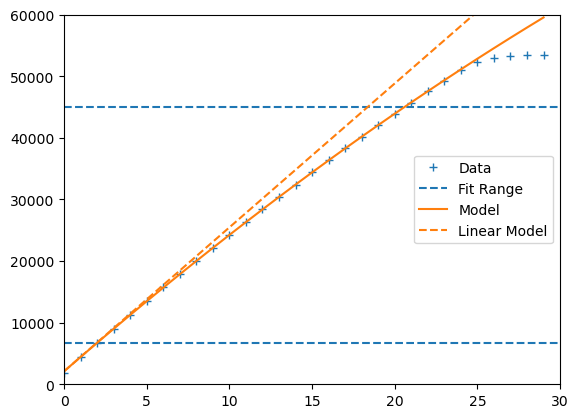

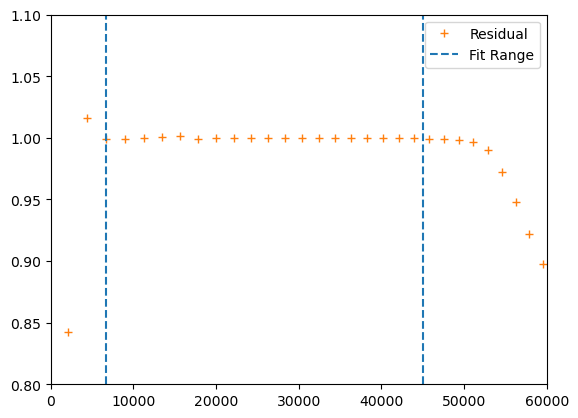

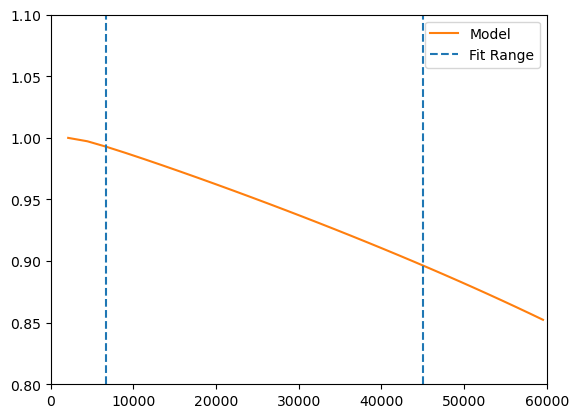

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1716.92
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4460.14
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6691.05
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8981.89
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11250.63
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13499.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15720.40
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17873.31
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 20038.94
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 22177.17
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24290.52
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

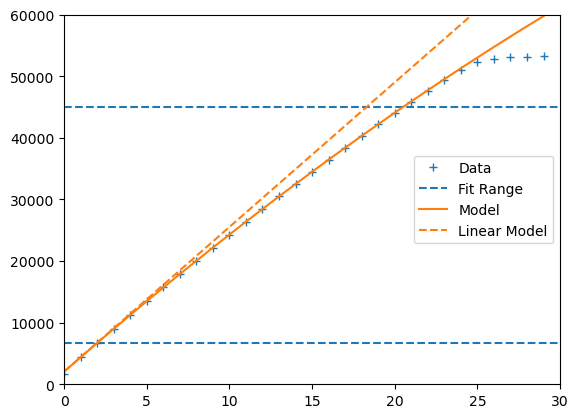

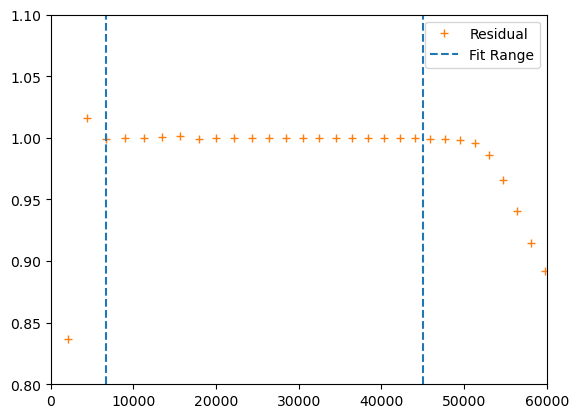

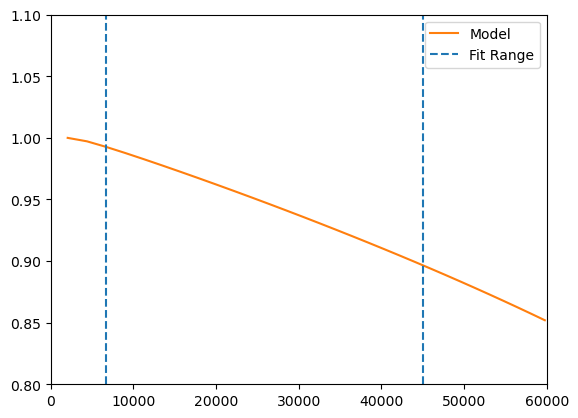

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1434.10
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4176.74
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6391.23
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8687.63
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10959.58
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13209.49
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15436.63
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17596.52
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19767.53
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21911.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24029.95
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

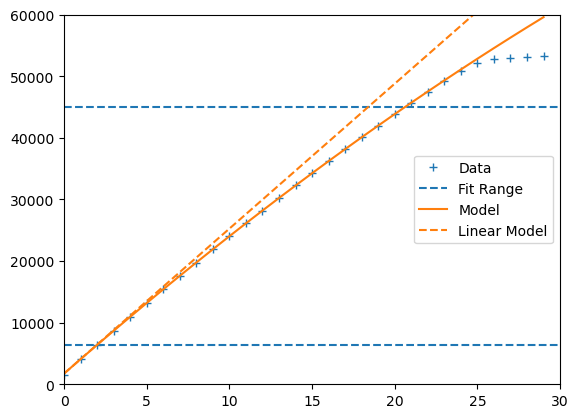

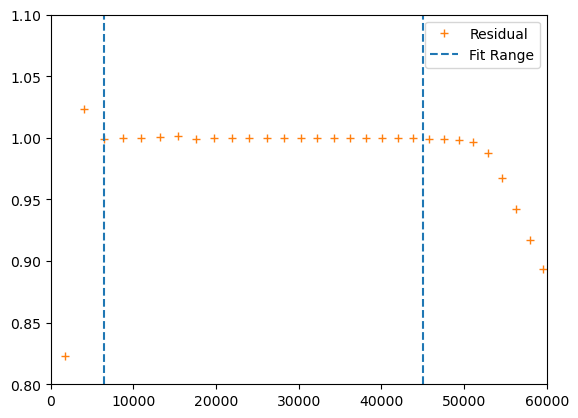

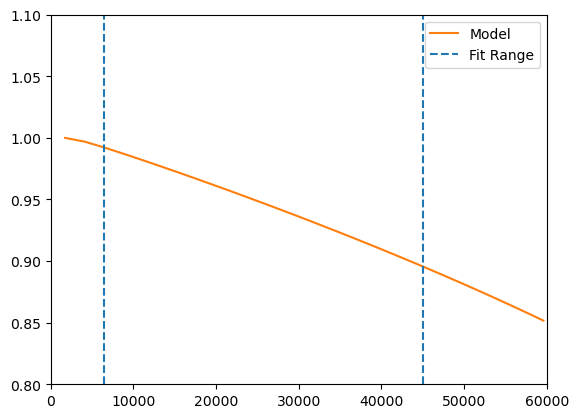

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1521.79
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4260.83
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6503.33
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8806.02
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11089.59
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13352.74
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15590.62
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17799.46
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19938.64
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 22090.92
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24218.86
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

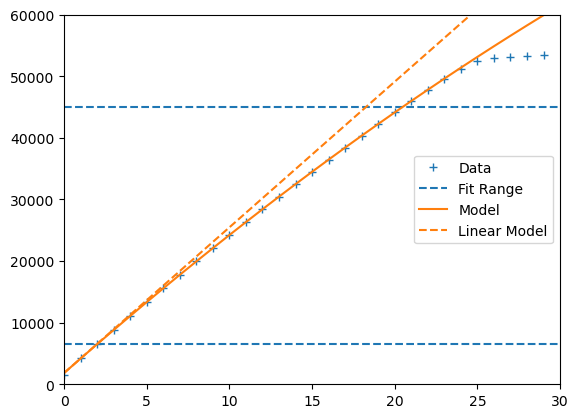

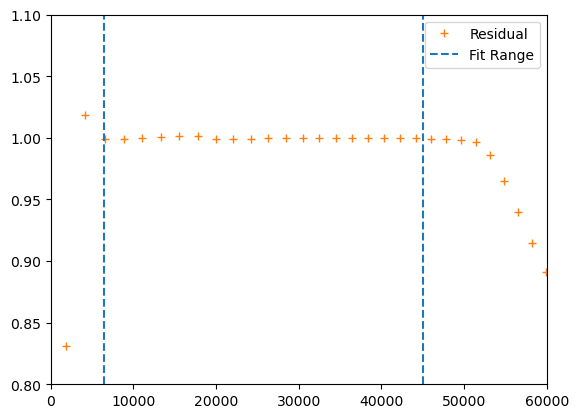

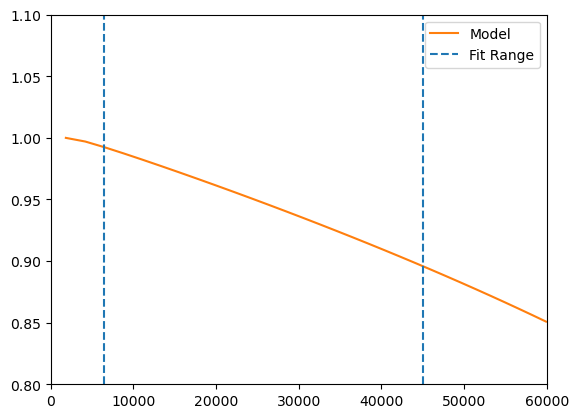

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1621.30
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4365.17
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6608.74
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8911.57
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11193.84
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13454.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15688.52
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17893.72
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 20030.23
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 22180.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24306.42
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

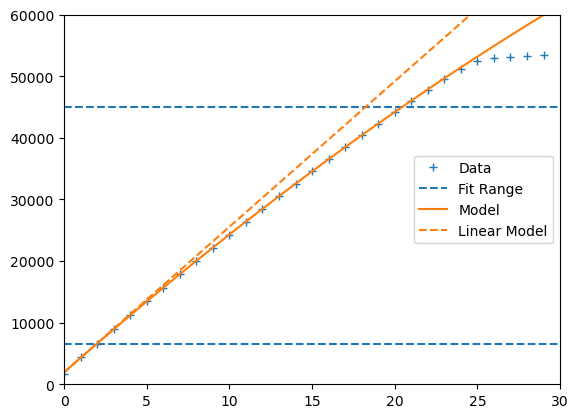

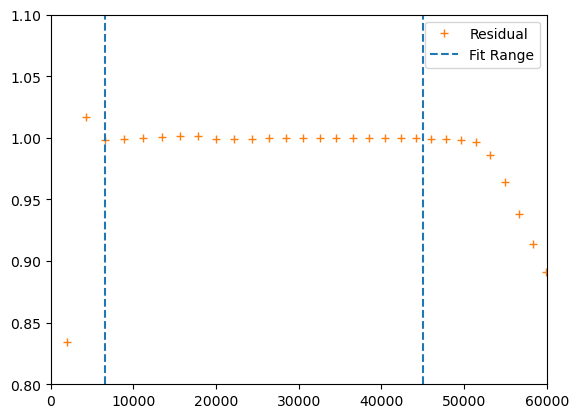

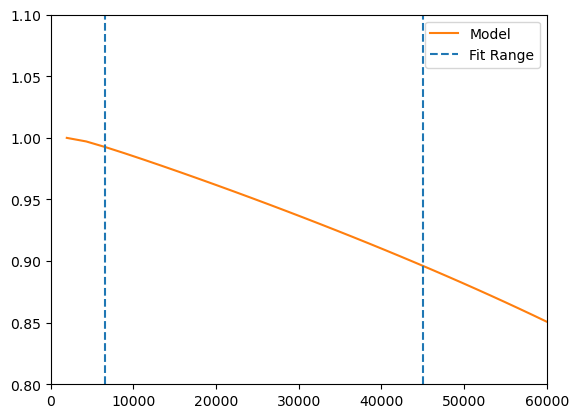

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1509.52
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4242.43
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6479.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8776.19
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11054.51
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13309.63
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15540.05
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17702.47
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19874.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 22020.00
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24141.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

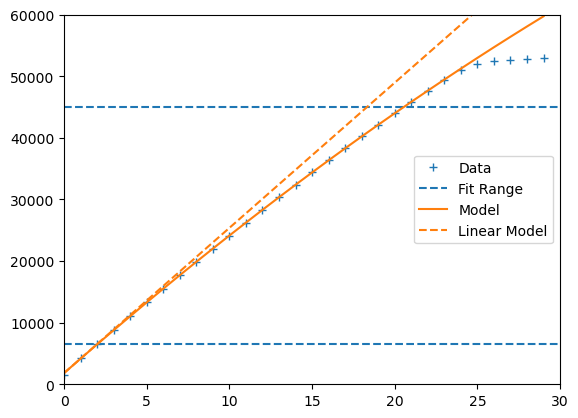

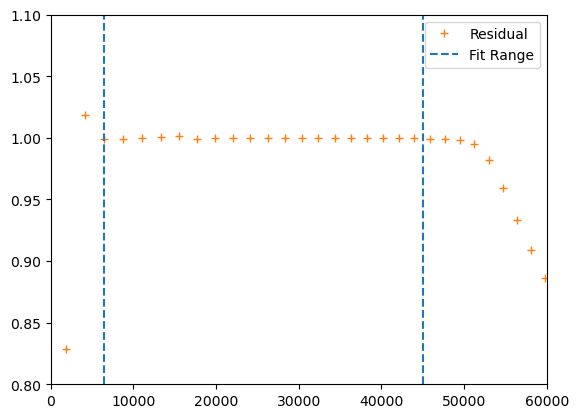

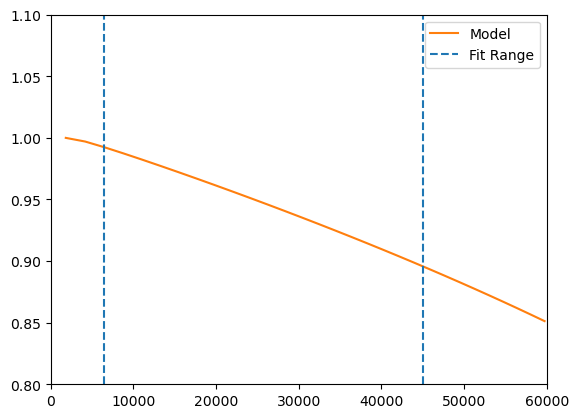

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1377.77
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4100.22
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6332.98
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8624.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10897.09
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13148.16
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15373.24
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17530.44
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19696.40
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21840.04
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23957.50
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

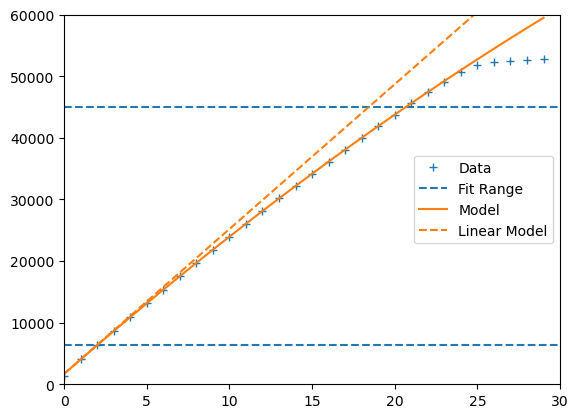

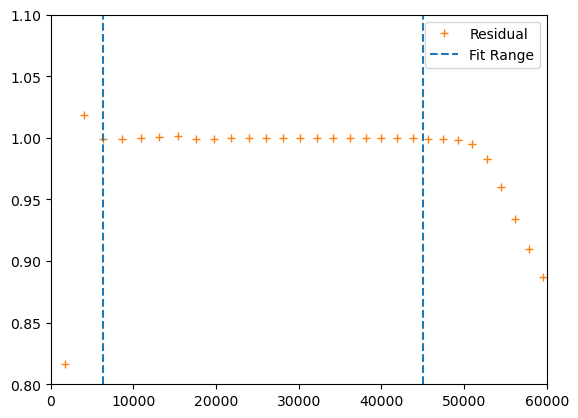

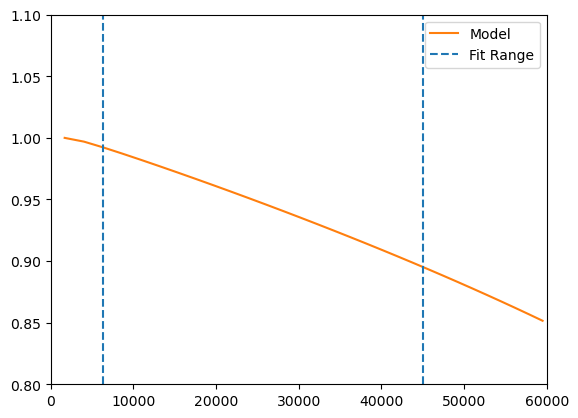

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1540.23
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4266.77
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6500.16
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8793.92
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11065.93
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13315.30
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15538.08
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17692.37
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19858.35
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21995.57
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24107.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

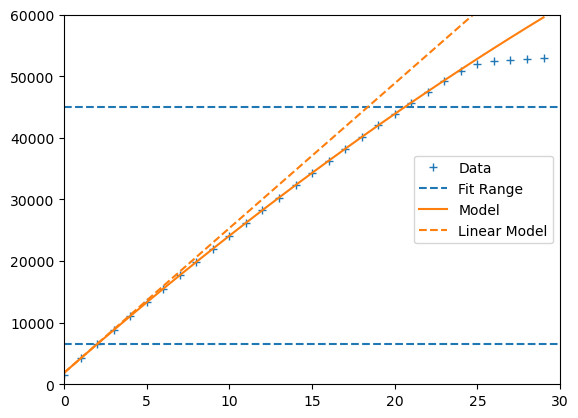

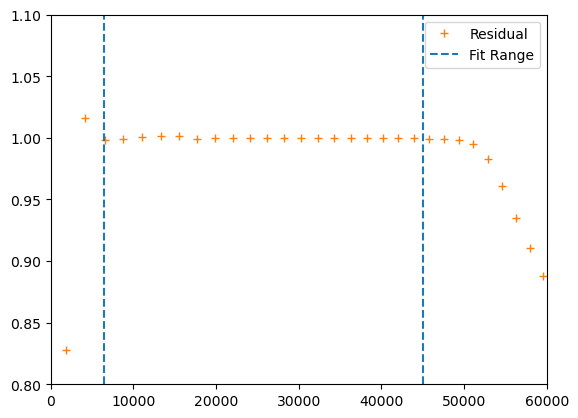

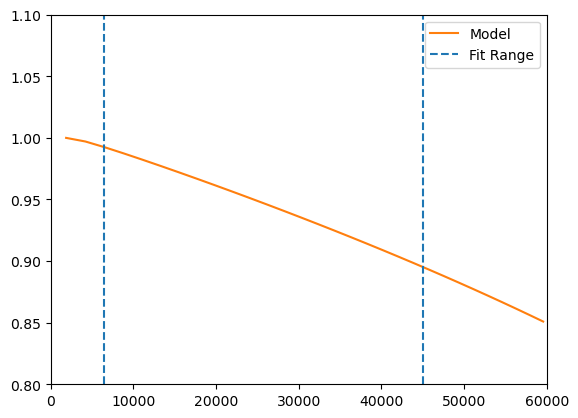

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1713.26
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4421.09
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6645.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8932.17
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 11196.73
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13437.70
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15651.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17840.33
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 20003.05
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 22090.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 24199.77
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

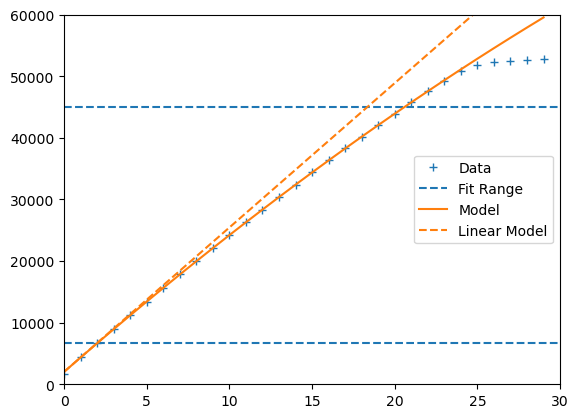

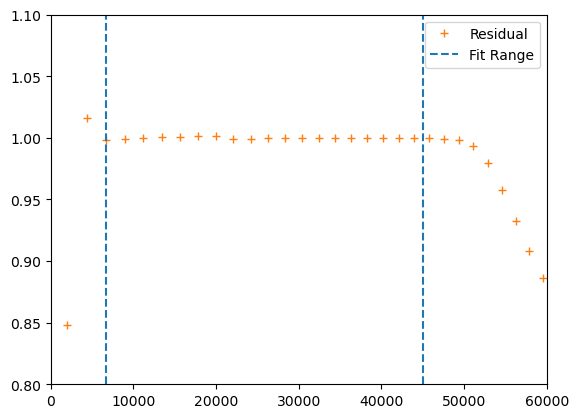

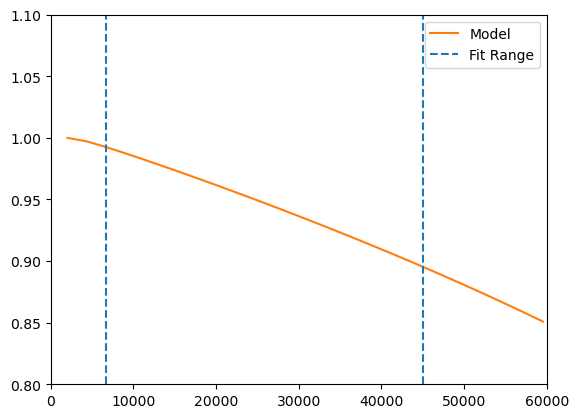

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1488.92
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4192.97
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6408.44
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8686.28
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10944.50
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13180.13
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15390.24
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17571.86
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19686.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21813.65
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23917.39
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

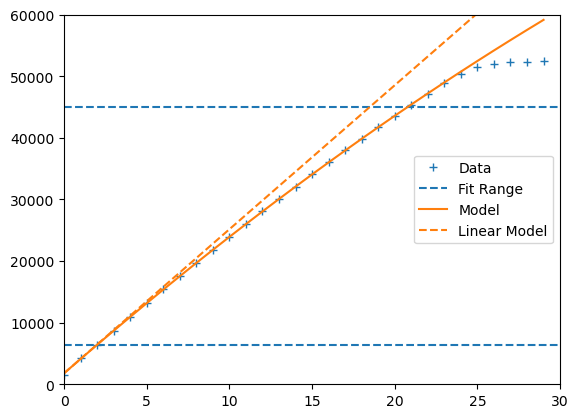

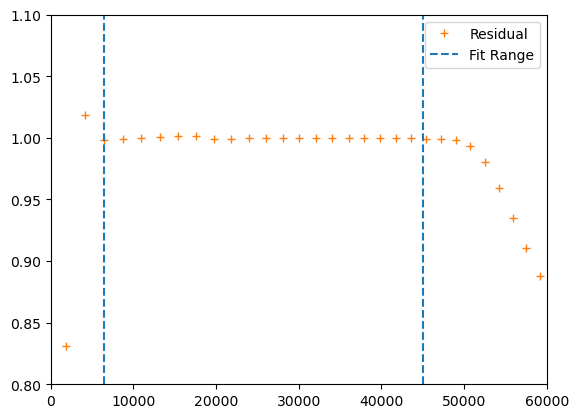

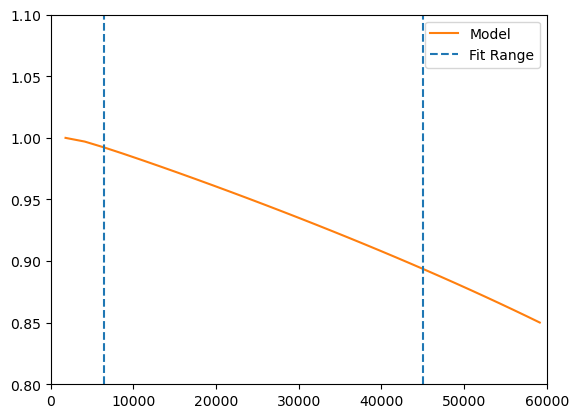

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1505.18
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4189.45
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6399.65
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8667.61
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10915.08
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13142.87
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15343.59
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17514.88
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19661.71
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21735.76
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23827.45
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

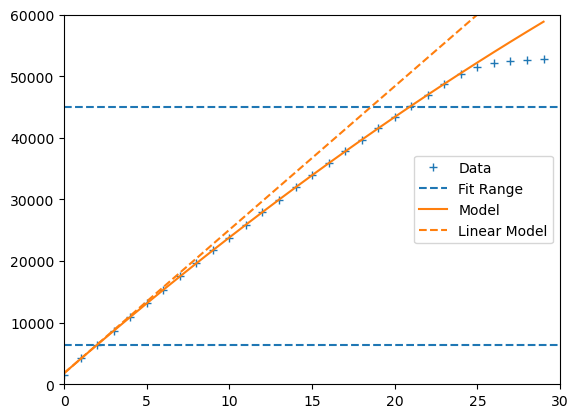

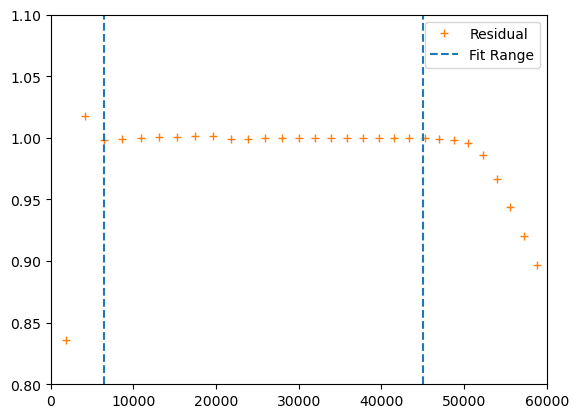

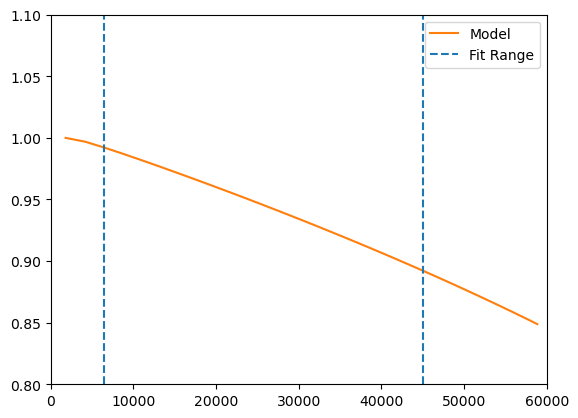

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1557.03
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  4178.87
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6362.35
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8609.96
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10832.74
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 13035.28
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 15217.01
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17366.93
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19490.68
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21589.33
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23613.71
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

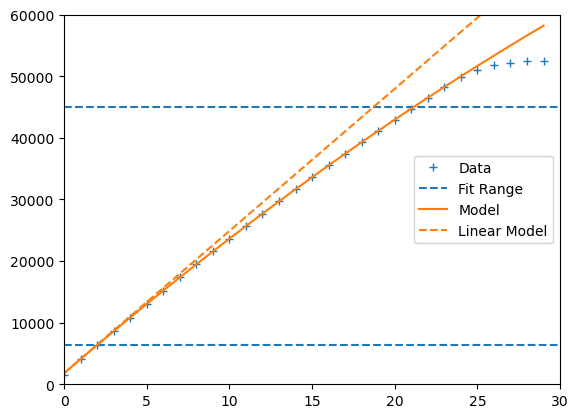

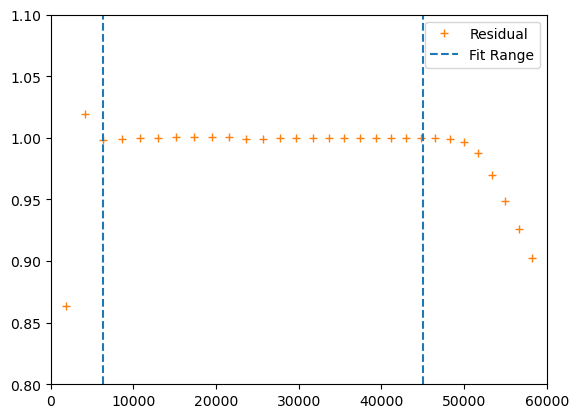

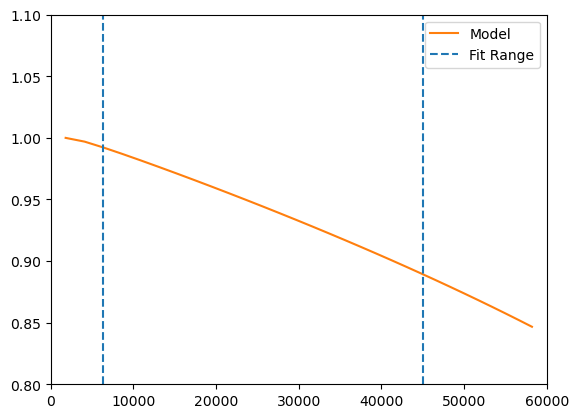

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1366.07
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3930.56
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  6102.58
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  8343.15
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4 10555.85
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 12742.83
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 14909.37
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 17044.38
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 19157.23
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 21192.62
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 23246.57
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

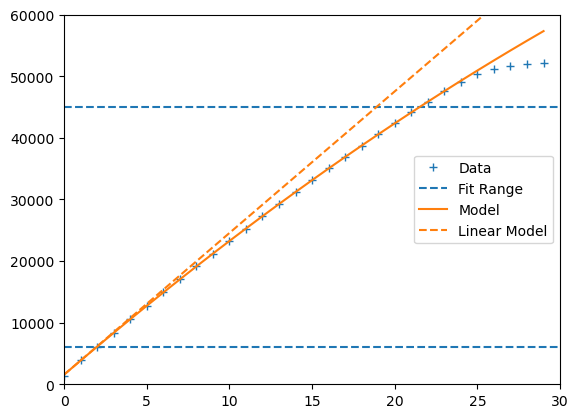

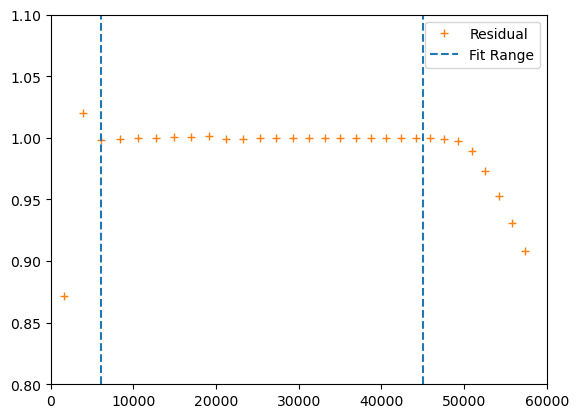

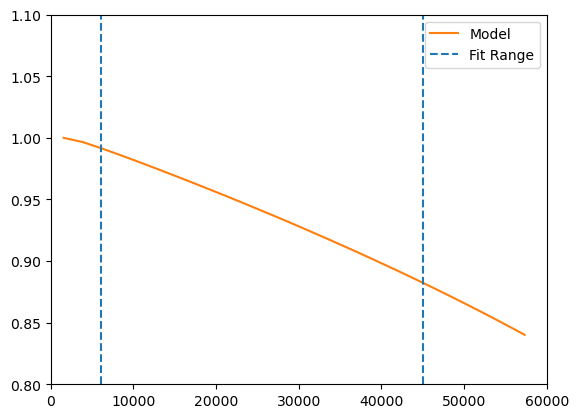

/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_49.773_00046.fits   0  1016.19
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_51.250_00047.fits   1  3416.80
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_52.726_00048.fits   2  5436.48
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_54.201_00049.fits   3  7552.69
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_55.677_00050.fits   4  9626.05
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_57.154_00051.fits   5 11693.51
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_02_58.630_00052.fits   6 13737.22
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_00.106_00053.fits   7 15750.40
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_01.582_00054.fits   8 17735.90
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_03.058_00055.fits   9 19693.08
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03_04.534_00056.fits  10 21624.78
/Users/alan/Downloads/frida/20251027/H2RG_Oct-27-19_03

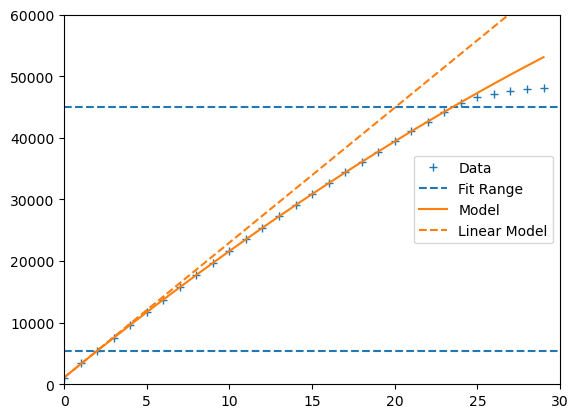

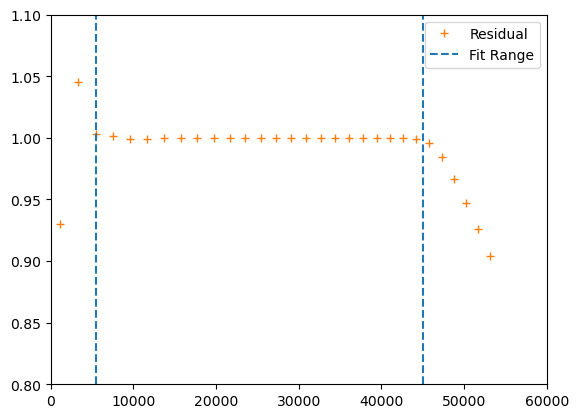

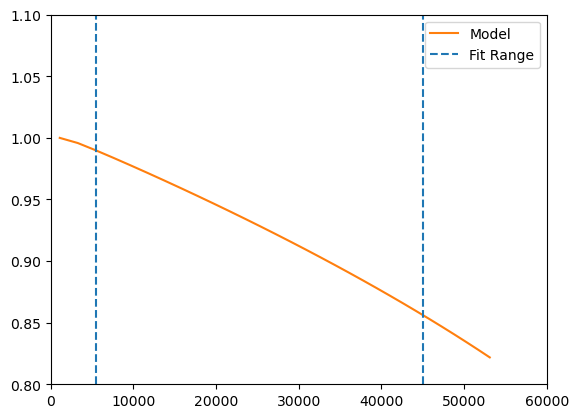

In [25]:
darkfitspaths = sorted(glob.glob(darkdirectory + "*.fits"))
flatfitspaths = sorted(glob.glob(flatdirectory + "*.fits"))

nreset = 3
nmax = 30
datamax = 45000

sy = slice(4, 2044)
sx = slice(4, 2044)


ifitmin = 2

f = []

def linearity(ichannel,axis=None):

    ifitmax = 0
    meanlist = []

    if ichannel == 0:
        sx = slice(4,64)
    elif ichannel == 32:
        sx = slice(64*31,-5)
    else:
        sx = slice(ichannel*64,(ichannel+1)*64)

    for i, darkfitspath, flatfitspath in zip(range(0, nmax), darkfitspaths[nreset-1:][:nmax], flatfitspaths[nreset-1:][:nmax]):
        header, darkdata = h2rg.readfits(darkfitspath)
        header, flatdata = h2rg.readfits(flatfitspath)
        data = flatdata - darkdata
        data = flatdata
        data = h2rg.channelcorrection(data, order=1)
        print(
            "%s %3d %8.2f"
            % (flatfitspath, i, np.nanmean(data[sy,sx]))
        )
        mean = np.nanmean(data[sy,sx], axis=axis)
        if mean < datamax:
            ifitmax = i
        meanlist.append(mean)

    i = np.arange(nmax)

    P = np.polynomial.Polynomial.fit(i[ifitmin:ifitmax], meanlist[ifitmin:ifitmax], 2).convert()
    P1 = P.truncate(2)
    print(P.coef)
    print(P1.coef)

    plt.plot(i, meanlist, linestyle="none", marker="+", label="Data")
    plt.axhline(meanlist[ifitmin], color="C0", linestyle="dashed", label="Fit Range")
    plt.axhline(datamax, color="C0", linestyle="dashed")
    plt.plot(i, P(i), label="Model", color="C1")
    plt.plot(i, P1(i), label="Linear Model", color="C1", linestyle="dashed")
    plt.ylim(0, 60e3)
    plt.xlim(0, nmax)
    plt.legend()
    plt.savefig("linearity-data-%02d.png" % ichannel)
    plt.show()

    plt.plot(P(i), meanlist/P(i), label="Residual", linestyle="none", marker="+", color="C1")
    plt.axvline(meanlist[ifitmin], color="C0", linestyle="dashed", label="Fit Range")
    plt.axvline(datamax, color="C0", linestyle="dashed")
    plt.legend()
    plt.xlim(0, 60e3)
    plt.ylim(0.8,1.1)
    plt.savefig("linearity-residual-%02d.png" % ichannel)
    plt.show()

    plt.plot(P(i), P(i) / P1(i), color="C1", label="Model")
    plt.axvline(meanlist[ifitmin], color="C0", linestyle="dashed", label="Fit Range")
    plt.axvline(datamax, color="C0", linestyle="dashed")
    plt.legend()
    plt.xlim(0, 60e3)
    plt.ylim(0.8,1.1)
    plt.savefig("linearity-correction-%02d.png" % ichannel)
    plt.show()

    f.append(P.coef[2] / P.coef[1])

for ichannel in range(0,32):
    linearity(ichannel)


In [26]:
print(f)

[np.float64(-0.004556850296152646), np.float64(-0.0042145896541808305), np.float64(-0.004238222974812538), np.float64(-0.004346065702326908), np.float64(-0.0044440902414609185), np.float64(-0.004635371987922276), np.float64(-0.004769209465713906), np.float64(-0.004845456855971454), np.float64(-0.00493251158148747), np.float64(-0.0050141687910207405), np.float64(-0.005129993607882925), np.float64(-0.005119188448956941), np.float64(-0.005165485479298574), np.float64(-0.005181433771661013), np.float64(-0.0051863255308221504), np.float64(-0.005208696775294363), np.float64(-0.005253546680716976), np.float64(-0.005235684581340945), np.float64(-0.00525028400051443), np.float64(-0.005257884286642126), np.float64(-0.005244547366971231), np.float64(-0.005279515068505315), np.float64(-0.005285622453148008), np.float64(-0.0052656879596194766), np.float64(-0.0052453739125122995), np.float64(-0.005281064122182288), np.float64(-0.00529546730837532), np.float64(-0.0053051903449135695), np.float64(-0.0

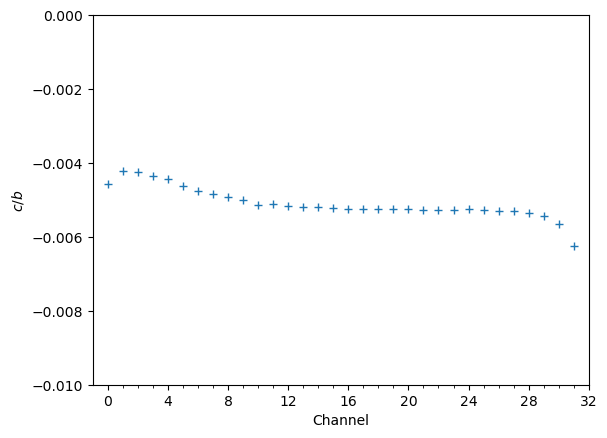

In [27]:
plt.plot(range(32), f, linestyle="none", marker="+")
plt.ylim(-0.01,0)
plt.xlim(-1,32)
plt.xticks(range(0,33,4))
plt.xticks(range(0,33), minor=True)
plt.xlabel("Channel")
plt.ylabel("$c/b$")
plt.savefig("linearity-channel.png")